# Capítulo 10: Modelos pre-entrenados y Trasferencia de aprendizaje

## Clasificación de imágenes de carros y motocicletas con CNN

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import shutil
import random

In [2]:
from google.colab import drive
#montamos drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Libro_IA/Datasets/carros_motocicletas.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/carros_motocicletas/")
zip_ref.close()

In [ ]:
directorio_principal = '/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/'
directorio_destino = '/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/'
extensiones = ['.jpg','.jpeg', '.png']  # Extensiones de las imágenes
porc_separacion = 0.8  # Proporción de imágenes para entrenamiento

In [ ]:
clases = []
# Crear carpetas para cada clase en el directorio de destino
for clase in os.listdir(directorio_principal):
    clases.append(clase)

In [ ]:
for clase in clases:
    os.makedirs(os.path.join(directorio_destino, 'entrenamiento', clase), exist_ok=True)
    os.makedirs(os.path.join(directorio_destino, 'validación', clase), exist_ok=True)

In [ ]:
# Dividir imágenes en conjuntos de entrenamiento y validación
for clase in clases:
      archivos = [archivo for archivo in os.listdir(os.path.join(directorio_principal, clase)) if os.path.splitext(archivo)[1] in extensiones]
      random.shuffle(archivos)
      indice_sep = int(len(archivos) * porc_separacion)

      for archivo in archivos[:indice_sep]:
           shutil.copy(os.path.join(directorio_principal, clase, archivo), os.path.join(directorio_destino, 'entrenamiento', clase, archivo))

      for archivo in archivos[indice_sep:]:
          shutil.copy(os.path.join(directorio_principal, clase, archivo), os.path.join(directorio_destino, 'validación', clase, archivo))

In [ ]:
dir_ent_motos = os.path.join(directorio_destino, 'entrenamiento', clases[0])
dir_val_motos = os.path.join(directorio_destino, 'validación', clases[0])
dir_ent_carros = os.path.join(directorio_destino, 'entrenamiento', clases[1])
dir_val_carros = os.path.join(directorio_destino, 'validación', clases[1])

NameError: name 'clases' is not defined

In [ ]:
print('Total muestras de entrenamiento de carros:', len(os.listdir(dir_ent_carros)))
print('Total muestras de entrenamiento de motos:', len(os.listdir(dir_ent_motos)))
print('Total muestras de validación de carros:', len(os.listdir(dir_val_carros)))
print('Total muestras de validación de motos:', len(os.listdir(dir_val_motos)))

Total muestras de entrenamiento de carros: 1922
Total muestras de entrenamiento de motos: 1564
Total muestras de validación de carros: 725
Total muestras de validación de motos: 589


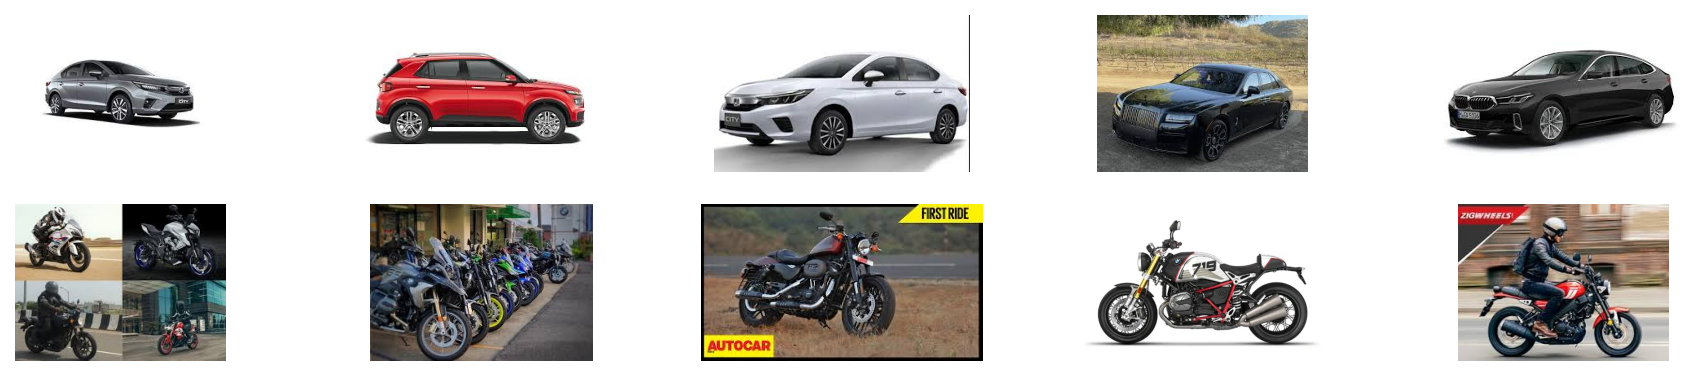

In [ ]:
import matplotlib.image as mpimg
from PIL import Image

plt.figure(figsize=(15, 3))

imgs_carros = os.listdir(dir_ent_carros)[:5]
imgs_motos = os.listdir(dir_ent_motos)[:5]

imgs_carros = [os.path.join(dir_ent_carros, archivo) for archivo in imgs_carros[:5]]
imgs_bicicletas = [os.path.join(dir_ent_motos, archivo) for archivo in imgs_motos[:5]]

for i, ruta_img in enumerate(imgs_carros + imgs_bicicletas):
    sp = plt.subplot(2, 5, i + 1)
    sp.axis('Off') # no se muestran los ejes
    img = mpimg.imread(ruta_img)
    plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Input


# se configura la red
modelo = Sequential()
modelo.add(Input(shape=(300, 300, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Conv2D(256, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,943,873 (129.49 MB)

 Trainable params: 33,943,873 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_datos_ent = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

gen_datos_pru  = ImageDataGenerator( rescale = 1.0/255. )


generador_ent = gen_datos_ent.flow_from_directory("/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/entrenamiento",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(300, 300))

generador_pru =  gen_datos_pru.flow_from_directory("/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/validación",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (300, 300))

Found 3486 images belonging to 2 classes.
Found 1314 images belonging to 2 classes.


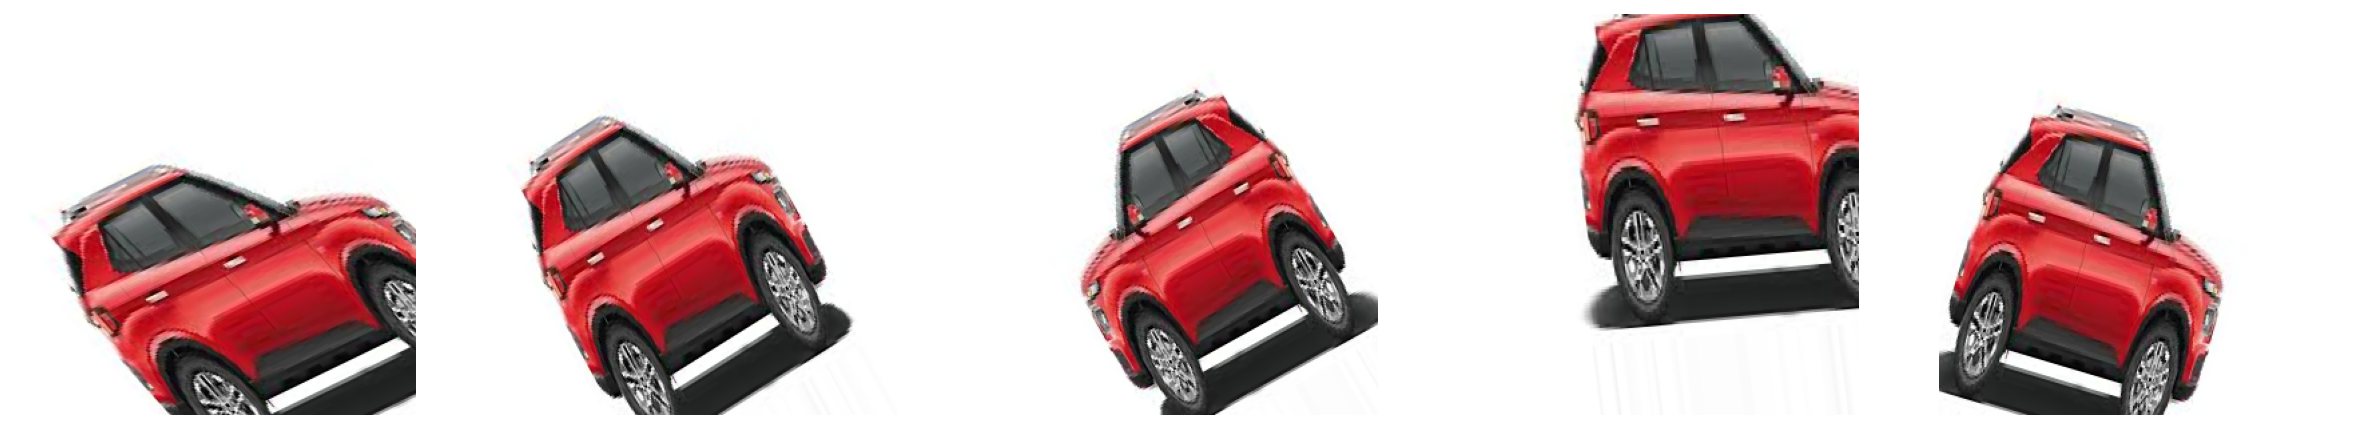

In [ ]:
from keras.utils import load_img, img_to_array
ruta_img = imgs_carros[1]
img = load_img(ruta_img, target_size=(300, 300))

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
gen = gen_datos_ent.flow(x, batch_size=1)

plt.figure(figsize=(20,10))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(next(gen).squeeze())
    plt.plot()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelo.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Entrenar el modelo
historico = modelo.fit(
    generador_ent,
    steps_per_epoch=100,
    epochs=20
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 529ms/step - acc: 0.5542 - loss: 0.7264
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - acc: 0.6238 - loss: 0.6732
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 534ms/step - acc: 0.6765 - loss: 0.6071
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - acc: 0.7264 - loss: 0.5582
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 538ms/step - acc: 0.7337 - loss: 0.5292
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 365ms/step - acc: 0.7623 - loss: 0.4980
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 525ms/step - acc: 0.7886 - loss: 0.4699
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - acc: 0.7878 - loss: 0.4447
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 520ms/step - acc: 0.8038 - loss: 0.4479
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - acc: 0.8160 - loss: 0.4100
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 105s 522ms/step - acc: 0.8368 - loss: 0.3934
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - acc: 0.8257 - l

In [ ]:
perdida_prueba, exactitud_prueba= modelo.evaluate(generador_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - acc: 0.8975 - loss: 0.2595
Exactitud de Prueba: 0.90


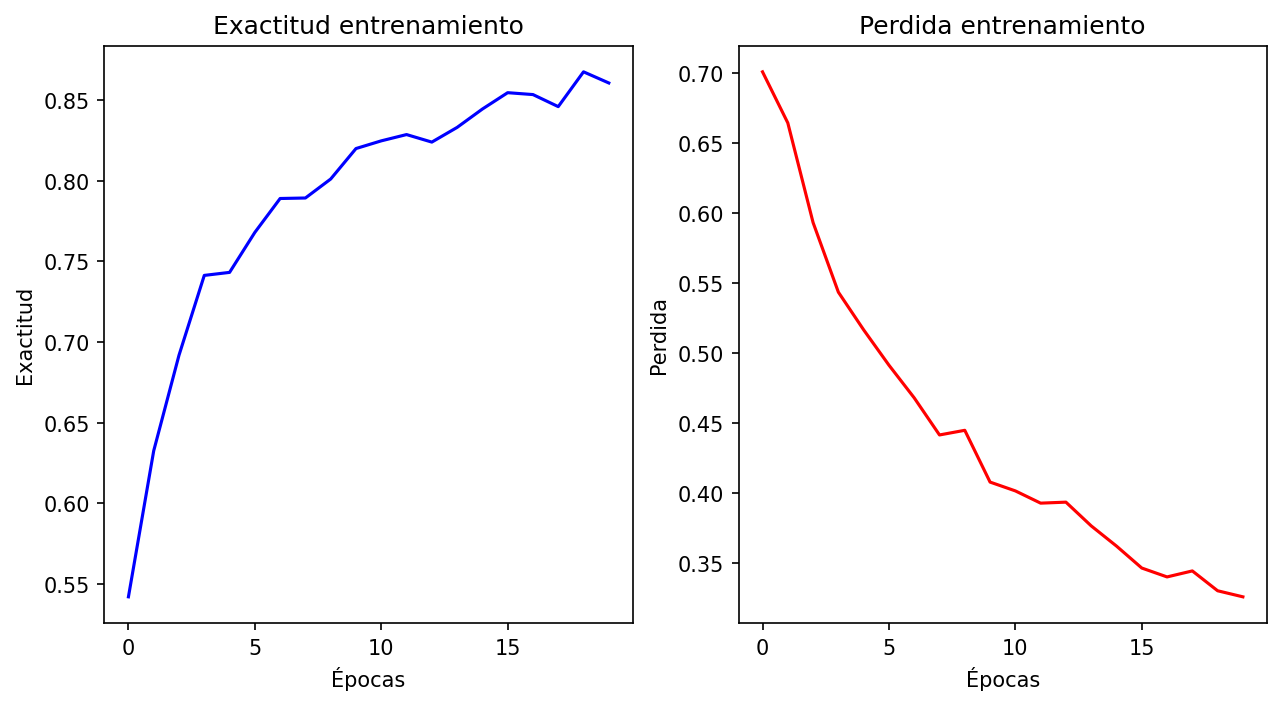

In [ ]:
plt.figure(figsize=(10,5))
n = np.arange(0, 20)
plt.subplot(121)
plt.title('Exactitud entrenamiento')
plt.plot(n, historico.history['acc'],'b')
plt.xlabel("Épocas")
plt.ylabel("Exactitud")

plt.subplot(122)
plt.title('Perdida entrenamiento')
plt.plot(n, historico.history['loss'],'r')
plt.xlabel("Épocas")
plt.ylabel("Perdida")
plt.show()

Saving moto3.jpg to moto3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Es un Carro


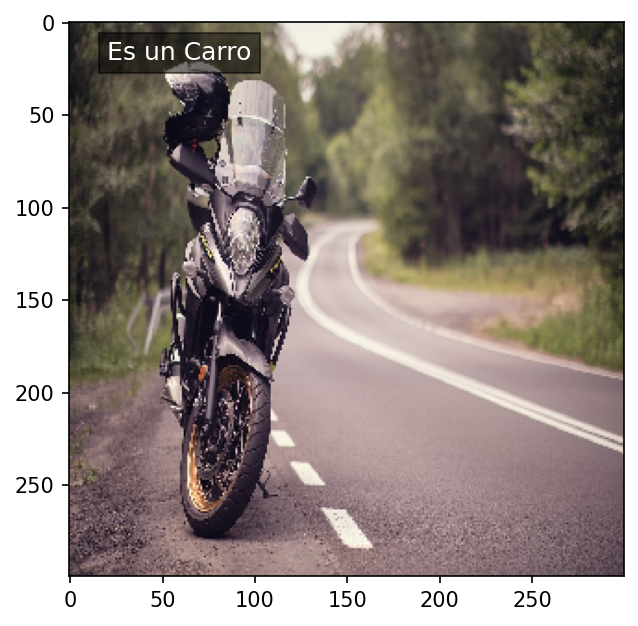

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

archivo=files.upload()
arc=list(archivo.keys())[0]

ruta='/content/' + arc
img=image.load_img(ruta, target_size=(300, 300))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

clase = modelo.predict(image)
if clase == 1:
    prediccion = 'Es un Carro'
else:
    prediccion = 'Es una Motocicleta'
print(prediccion)

plt.text(20, 20, prediccion, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.imshow(img)
plt.show()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                          patience=3,
                                         restore_best_weights=True)

historico = modelo.fit(
    generador_ent,
    steps_per_epoch=100,
    epochs=20,
    callbacks=[callback]
)

NameError: name 'tf' is not defined

In [ ]:
perdida_prueba, exactitud_prueba= modelo.evaluate(generador_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - acc: 0.9119 - loss: 0.1939
Exactitud de Prueba: 0.91


## Extracción de características

In [ ]:
from tensorflow.keras.applications import VGG16

modelo_preentrenado = VGG16(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for capa in modelo_preentrenado.layers:
  capa.trainable = False

modelo_preentrenado.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelEC = Sequential()
modelEC.add(modelo_preentrenado)
modelEC.add(Flatten())
modelEC.add(Dense(256, activation='relu'))
modelEC.add(Dense(1, activation='sigmoid'))
modelEC.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_datos_ent = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

gen_datos_pru  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
gen_ent = gen_datos_ent.flow_from_directory("/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/entrenamiento",
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(224, 224))

gen_pru =  gen_datos_pru.flow_from_directory("/content/drive/MyDrive/carros_motocicletas/Car-Bike-Dataset/validación",
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 3486 images belonging to 2 classes.
Found 1314 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelEC.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

historico = modelEC.fit(
    gen_ent,
    steps_per_epoch=100,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 352s 3s/step - acc: 0.8064 - loss: 0.5124
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 926ms/step - acc: 0.9309 - loss: 0.1776
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - acc: 0.9361 - loss: 0.1678
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 455ms/step - acc: 0.9418 - loss: 0.1448
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 504ms/step - acc: 0.9560 - loss: 0.1083
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - acc: 0.9532 - loss: 0.1270
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - acc: 0.9641 - loss: 0.1051
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - acc: 0.9556 - loss: 0.1157
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 348ms/step - acc: 0.9661 - loss: 0.0979
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - acc: 0.9550 - loss: 0.1116
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 352ms/step - acc: 0.9614 - loss: 0.0836
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - acc: 0.9528 - loss: 0.1111
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 349ms/step - acc: 0.9647 - loss: 0.1019
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.9610 - loss: 0.1097


In [ ]:
perdida_prueba, exactitud_prueba= modelEC.evaluate(gen_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

66/66 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - acc: 0.9854 - loss: 0.0475
Exactitud de Prueba: 0.98


Saving moto_via.jpg to moto_via (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


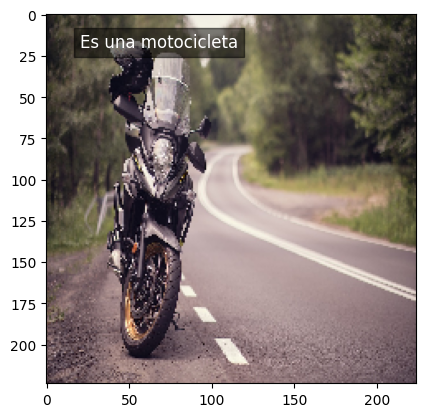

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

archivo=files.upload()
arc=list(archivo.keys())[0]
ruta='/content/' + arc
img=image.load_img(ruta, target_size=(224, 224))
x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)

clase = modelEC.predict(image)
if clase == 1:
    prediccion = 'Es un Carro'
else:
    prediccion = 'Es una motocicleta'

plt.text(20, 20, prediccion, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.imshow(img)
plt.show()

## Ajuste Fino

In [ ]:
from tensorflow.keras.applications import VGG16

modelo_preentrenado = VGG16(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
modelo_preentrenado.trainable = True

In [ ]:
modeloAF = Sequential()
modeloAF.add(modelo_preentrenado)
modeloAF.add(Flatten())
modeloAF.add(Dense(256, activation='relu'))
modeloAF.add(Dense(1, activation='sigmoid'))
modeloAF.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

modeloAF.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Realizar ajuste fino en las últimas 4 capas del modelo base
for capa in modeloAF.layers[0].layers[-4:]:
    capa.trainable = True

In [ ]:
# Entrenar el modelo
historico = modeloAF.fit(
    gen_ent,
    steps_per_epoch=100,
    epochs=20
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 418ms/step - acc: 0.5461 - loss: 0.8392
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 437ms/step - acc: 0.7836 - loss: 0.4664
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 424ms/step - acc: 0.8628 - loss: 0.3257
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 324ms/step - acc: 0.9159 - loss: 0.2011
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 421ms/step - acc: 0.9389 - loss: 0.1609
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - acc: 0.9369 - loss: 0.1766
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 420ms/step - acc: 0.9079 - loss: 0.2656
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 314ms/step - acc: 0.9454 - loss: 0.1412
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 441ms/step - acc: 0.9463 - loss: 0.1266
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - acc: 0.9540 - loss: 0.1403
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 432ms/step - acc: 0.9665 - loss: 0.1011
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 313ms/step - acc: 0.9655 - lo

In [ ]:
perdida_prueba, exactitud_prueba= modeloAF.evaluate(gen_pru)
print ("Exactitud de Prueba: {:.2f}".format(exactitud_prueba))

40/40 [==============================] - 213s 5s/step - loss: 0.1154 - acc: 0.9550
Exactitud de Prueba: 0.95
